In [1]:
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))
os.chdir(project_root)

import sys
sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from src.config import CCY_PAIRS, START_DATE, END_DATE
from src.data_utils import get_fx_data, compute_log_ret, to_binary

In [4]:
df = get_fx_data(CCY_PAIRS, START_DATE, END_DATE, df=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

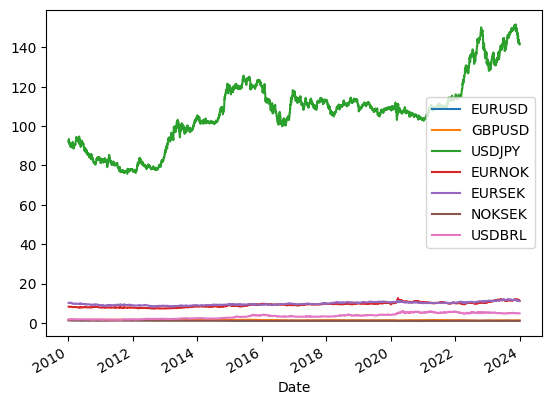

In [5]:
df.plot()

In [6]:
df = compute_log_ret(df)

In [7]:
df

,EURUSD,GBPUSD,USDJPY,EURNOK,EURSEK,NOKSEK,USDBRL,EURUSD_log_ret,GBPUSD_log_ret,USDJPY_log_ret,EURNOK_log_ret,EURSEK_log_ret,NOKSEK_log_ret,USDBRL_log_ret
Date,,,,,,,,,,,,,,
2010-01-05,1.436596,1.599079,91.584999,8.20530,10.19780,1.24210,1.737000,-0.004031,-0.007657,-0.009887,-0.002203,0.003527,0.006299,0.010417
2010-01-06,1.440403,1.602384,92.356003,8.15920,10.18450,1.24690,1.731500,0.002647,0.002065,0.008383,-0.005634,-0.001305,0.003857,-0.003171
2010-01-07,1.431803,1.593397,93.389999,8.17200,10.19030,1.24600,1.738900,-0.005989,-0.005625,0.011134,0.001568,0.000569,-0.000722,0.004265
2010-01-08,1.441109,1.602410,92.660004,8.15500,10.19220,1.23990,1.732000,0.006478,0.005641,-0.007847,-0.002082,0.000186,-0.004908,-0.003976
2010-01-11,1.451126,1.611292,92.092003,8.13240,10.20760,1.25400,1.731000,0.006927,0.005527,-0.006149,-0.002775,0.001510,0.011308,-0.000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.102657,1.267700,142.341995,11.22920,11.00437,0.96970,4.869844,0.001851,-0.000630,0.001913,-0.006789,-0.008573,-0.012391,-0.002452
2023-12-26,1.102026,1.270487,142.229996,11.21428,10.99726,0.97548,4.869744,-0.000573,0.002195,-0.000787,-0.001330,-0.000646,0.005943,-0.000021
2023-12-27,1.104301,1.272718,142.460999,11.19997,11.02066,0.98356,4.813500,0.002063,0.001755,0.001623,-0.001277,0.002126,0.008249,-0.011617


In [18]:
df["{}_log_ret".format("EURUSD")].min()

-0.028144080771162875

In [20]:
EPSILON = np.finfo(float).eps
ccy_pairs = ["EURUSD"]
dfs = []
for instr in ccy_pairs:
    curr_samples = df["{}_log_ret".format(instr)]

    X_min = curr_samples.min() - EPSILON
    X_max = curr_samples.max() + EPSILON


    X_integer = ((curr_samples - X_min) / (X_max - X_min) * 65535).astype(int)

In [21]:
X_integer

Date
2010-01-05    26601
2010-01-06    33967
2010-01-07    24441
2010-01-08    38194
2010-01-11    38689
              ...  
2023-12-25    33089
2023-12-26    30415
2023-12-27    33323
2023-12-28    37584
2023-12-29    27023
Name: EURUSD_log_ret, Length: 3640, dtype: int64

In [22]:
X_binary = X_integer.apply(lambda x: format(x, '016b'))

In [25]:
X_binary.apply(list)

Date
2010-01-05    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
2010-01-06    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
2010-01-07    [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
2010-01-08    [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
2010-01-11    [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
                                    ...                       
2023-12-25    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
2023-12-26    [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
2023-12-27    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
2023-12-28    [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
2023-12-29    [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
Name: EURUSD_log_ret, Length: 3640, dtype: object

In [26]:
binary_split = X_binary.apply(list)

binary_df = pd.DataFrame(binary_split.tolist(), columns=[f'EURUSD_{i:02}' for i in range(1, 17)])

In [27]:
binary_df

,EURUSD_01,EURUSD_02,EURUSD_03,EURUSD_04,EURUSD_05,EURUSD_06,EURUSD_07,EURUSD_08,EURUSD_09,EURUSD_10,EURUSD_11,EURUSD_12,EURUSD_13,EURUSD_14,EURUSD_15,EURUSD_16
0,0,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1
1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1
2,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1
3,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0
4,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3636,0,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1
3637,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1
3638,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0


In [28]:
import numpy as np
import pandas as pd

def to_binary(df: pd.DataFrame) -> pd.DataFrame:
    """
    To map log returns to a 16-bits digit, we compute the spread between the current value
    and the minimum value amongst all the samples, and get a [0,1]-valued float computing
    (X_curr - X_min) / (X_max - X_min). Then, multiply by 65535 (2^16 - 1).
    """
    Nsamples, Nvariables = df.shape
    binary_features = []
    
    EPSILON = np.finfo(float).eps

    ccy_pairs = set([s.split('_')[0] for s in df.columns])
    dfs = []
    for instr in ccy_pairs:
        curr_samples = df["{}_log_ret".format(instr)]
        
        X_min = curr_samples.min() - EPSILON
        X_max = curr_samples.max() + EPSILON
        
        X_integer = ((curr_samples - X_min) / (X_max - X_min) * 65535).astype(int)
        X_binary = X_integer.apply(lambda x: format(x, '016b'))
        
        binary_split = X_binary.apply(list)
        
        binary_df = pd.DataFrame(binary_split.tolist(), columns=[f'{instr}_{i:02}' for i in range(1, 17)])
        
        dfs.append(binary_df)

    return pd.concat(dfs, axis=1).dropna()

In [29]:
to_binary(df)

,NOKSEK_01,NOKSEK_02,NOKSEK_03,NOKSEK_04,NOKSEK_05,NOKSEK_06,NOKSEK_07,NOKSEK_08,NOKSEK_09,NOKSEK_10,...,USDJPY_07,USDJPY_08,USDJPY_09,USDJPY_10,USDJPY_11,USDJPY_12,USDJPY_13,USDJPY_14,USDJPY_15,USDJPY_16
0,1,0,0,1,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
3,0,1,1,0,1,0,1,0,1,1,...,1,0,0,0,1,0,1,1,0,1
4,1,0,1,0,0,0,0,1,1,0,...,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,0,1,0,1,0,0,0,1,1,0,...,1,1,0,1,0,0,1,0,1,1
3636,1,0,0,0,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3637,1,0,0,1,0,1,1,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3638,0,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,1,0


In [11]:
df.shape

(3640, 14)

In [12]:
def float_to_binary(value: float) -> str:
    # Define constants
    EPSILON = np.finfo(float).eps
    MAX_INT = 65535

    # Calculate the integer representation
    X_min = value - EPSILON
    X_max = value + EPSILON
    X_integer = int(((value - X_min) / (X_max - X_min)) * MAX_INT)

    # Convert to binary
    binary_representation = format(X_integer, '016b')
    
    return binary_representation


In [16]:
float_to_binary(0.006299)

'0111111111111111'

In [15]:
df

,EURUSD,GBPUSD,USDJPY,EURNOK,EURSEK,NOKSEK,USDBRL,EURUSD_log_ret,GBPUSD_log_ret,USDJPY_log_ret,EURNOK_log_ret,EURSEK_log_ret,NOKSEK_log_ret,USDBRL_log_ret
Date,,,,,,,,,,,,,,
2010-01-05,1.436596,1.599079,91.584999,8.20530,10.19780,1.24210,1.737000,-0.004031,-0.007657,-0.009887,-0.002203,0.003527,0.006299,0.010417
2010-01-06,1.440403,1.602384,92.356003,8.15920,10.18450,1.24690,1.731500,0.002647,0.002065,0.008383,-0.005634,-0.001305,0.003857,-0.003171
2010-01-07,1.431803,1.593397,93.389999,8.17200,10.19030,1.24600,1.738900,-0.005989,-0.005625,0.011134,0.001568,0.000569,-0.000722,0.004265
2010-01-08,1.441109,1.602410,92.660004,8.15500,10.19220,1.23990,1.732000,0.006478,0.005641,-0.007847,-0.002082,0.000186,-0.004908,-0.003976
2010-01-11,1.451126,1.611292,92.092003,8.13240,10.20760,1.25400,1.731000,0.006927,0.005527,-0.006149,-0.002775,0.001510,0.011308,-0.000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.102657,1.267700,142.341995,11.22920,11.00437,0.96970,4.869844,0.001851,-0.000630,0.001913,-0.006789,-0.008573,-0.012391,-0.002452
2023-12-26,1.102026,1.270487,142.229996,11.21428,10.99726,0.97548,4.869744,-0.000573,0.002195,-0.000787,-0.001330,-0.000646,0.005943,-0.000021
2023-12-27,1.104301,1.272718,142.460999,11.19997,11.02066,0.98356,4.813500,0.002063,0.001755,0.001623,-0.001277,0.002126,0.008249,-0.011617


In [10]:
to_binary(df)

ValueError: 224 columns passed, passed data had 16 columns

In [110]:
to_binary(df)

/Users/vivientisserand/dev/ensae/rbm/src/data_utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df
/Users/vivientisserand/dev/ensae/rbm/src/data_utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df
/Users/vivientisserand/dev/ensae/rbm/src/data_utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,EURUSD,GBPUSD,USDJPY,EURNOK,EURSEK,NOKSEK,USDBRL,EURUSD_log_ret,GBPUSD_log_ret,USDJPY_log_ret,...,EURSEK_log_ret,NOKSEK_log_ret,USDBRL_log_ret,GBPUSD_log_ret_binary,EURUSD_log_ret_binary,USDJPY_log_ret_binary,EURNOK_log_ret_binary,USDBRL_log_ret_binary,EURSEK_log_ret_binary,NOKSEK_log_ret_binary
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.436596,1.599079,91.584999,8.20530,10.19780,1.24210,1.737000,-0.004031,-0.007657,-0.009887,...,0.003527,0.006299,0.010417,-1101111011011000001110001010100010011010011,-111010101001101101110101101010010001011000,-10001111111000000110101000000100010010110000,-100000000100000110111111111110001110010111,10010111100101010111100100001111010111101110,110011010100011001001000001101101000010110,1011011101010110101111010011010100101001111
2010-01-06,1.440403,1.602384,92.356003,8.15920,10.18450,1.24690,1.731500,0.002647,0.002065,0.008383,...,-0.001305,0.003857,-0.003171,11110000011001000110100011111111010100001,100110100001000001110111000001101101101011,1111001111111011110011001001100011100000100,-1010001111111010010101101101011110000101010,-101110001001100100111001110010101110101111,-10010111111011010111100101010101101101100,111000001000000011110101100101100000100111
2010-01-07,1.431803,1.593397,93.389999,8.17200,10.19030,1.24600,1.738900,-0.005989,-0.005625,0.011134,...,0.000569,-0.000722,0.004265,-1010001110110010010100110100011111011100100,-1010111001001001111111100101111111111100101,10100010000000111011111110010101110110100101,10110110011111010111101101011111000100010,111110000011101101110000110000100011110000,1000010010010000001101000100101110001100,-1010100000011001010100000010100101100100
2010-01-08,1.441109,1.602410,92.660004,8.15500,10.19220,1.23990,1.732000,0.006478,0.005641,-0.007847,...,0.000186,-0.004908,-0.003976,1010010000101010000011001100111001100001101,1011110010001011011110100011011100110010111,-1110010001100011010010101011011101000010010,-11110010011011100100110011001010111100100,-111001110110110101101001000011110001000011,10101101100110101101110111111011110100,-1000111011010101011110111110011011000001100
2010-01-11,1.451126,1.611292,92.092003,8.13240,10.20760,1.25400,1.731000,0.006927,0.005527,-0.006149,...,0.001510,0.011308,-0.000578,1010000011011110111001110111000010110011111,1100100110011001001111111101100010110101100,-1011001011110100001101100011011010011100101,-101000011000100101010010111110101111111001,-1000011001111001010100001001111011111010,10101111110000111110101100001101010010110,10100100100011000101111111010011111110000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.102657,1.267700,142.341995,11.22920,11.00437,0.96970,4.869844,0.001851,-0.000630,0.001913,...,-0.008573,-0.012391,-0.002452,-1001001010111011111010000010001010100011,11010111011101000001111011011100111001100,11011110101010001110110101111111001001011,-1100010110011001101000110000011010011110101,-100011101011101111001101011010011001011101,-1111100110000100110001101111001001010110101,-10110100010011110000011001110111110110110110
2023-12-26,1.102026,1.270487,142.229996,11.21428,10.99726,0.97548,4.869744,-0.000573,0.002195,-0.000787,...,-0.000646,0.005943,-0.000021,11111111100101101010011010000011111000000,-1000010101111000111110000000011001101001,-1011011101000101011010101110000111010101,-10011010110010001010101010000001000110101,-10011001001101000001111000000011011,-1001011001111001011110111001011111001011,1010110011110110011101100101111000101010001
2023-12-27,1.104301,1.272718,142.460999,11.19997,11.02066,0.98356,4.813500,0.002063,0.001755,0.001623,...,0.002126,0.008249,-0.011617,11001100010010101100101001110100010010011,11110000001001101111001111100111011000100,10111100111011000010101100111000101011011,-10010100101001010100011000110011001101110,-10101001000011000011110111011100001011010110,11110111011100101110110000001100111001101,1111000000010011110001001111001001110101001


In [75]:
for instr in CCY_PAIRS:
    df["{}_log_ret".format(instr)] = np.log(df["{}".format(instr)] / df["{}".format(instr)].shift(1))

In [79]:
df.columns

Index(['EURUSD', 'GBPUSD', 'USDJPY', 'EURNOK', 'EURSEK', 'NOKSEK', 'USDBRL',
       'EURUSD log_ret', 'GBPUSD log_ret', 'USDJPY log_ret', 'EURNOK log_ret',
       'EURSEK log_ret', 'NOKSEK log_ret', 'USDBRL log_ret', 'EURUSD_log_ret',
       'GBPUSD_log_ret', 'USDJPY_log_ret', 'EURNOK_log_ret', 'EURSEK_log_ret',
       'NOKSEK_log_ret', 'USDBRL_log_ret'],
      dtype='object')

In [76]:
df

,EURUSD,GBPUSD,USDJPY,EURNOK,EURSEK,NOKSEK,USDBRL,EURUSD log_ret,GBPUSD log_ret,USDJPY log_ret,...,EURSEK log_ret,NOKSEK log_ret,USDBRL log_ret,EURUSD_log_ret,GBPUSD_log_ret,USDJPY_log_ret,EURNOK_log_ret,EURSEK_log_ret,NOKSEK_log_ret,USDBRL_log_ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.442398,1.611370,92.495003,8.22340,10.16190,1.23430,1.719000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.436596,1.599079,91.584999,8.20530,10.19780,1.24210,1.737000,-0.004031,-0.007657,-0.009887,...,0.003527,0.006299,0.010417,-0.004031,-0.007657,-0.009887,-0.002203,0.003527,0.006299,0.010417
2010-01-06,1.440403,1.602384,92.356003,8.15920,10.18450,1.24690,1.731500,0.002647,0.002065,0.008383,...,-0.001305,0.003857,-0.003171,0.002647,0.002065,0.008383,-0.005634,-0.001305,0.003857,-0.003171
2010-01-07,1.431803,1.593397,93.389999,8.17200,10.19030,1.24600,1.738900,-0.005989,-0.005625,0.011134,...,0.000569,-0.000722,0.004265,-0.005989,-0.005625,0.011134,0.001568,0.000569,-0.000722,0.004265
2010-01-08,1.441109,1.602410,92.660004,8.15500,10.19220,1.23990,1.732000,0.006478,0.005641,-0.007847,...,0.000186,-0.004908,-0.003976,0.006478,0.005641,-0.007847,-0.002082,0.000186,-0.004908,-0.003976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.102657,1.267700,142.341995,11.22920,11.00437,0.96970,4.869844,0.001851,-0.000630,0.001913,...,-0.008573,-0.012391,-0.002452,0.001851,-0.000630,0.001913,-0.006789,-0.008573,-0.012391,-0.002452
2023-12-26,1.102026,1.270487,142.229996,11.21428,10.99726,0.97548,4.869744,-0.000573,0.002195,-0.000787,...,-0.000646,0.005943,-0.000021,-0.000573,0.002195,-0.000787,-0.001330,-0.000646,0.005943,-0.000021
2023-12-27,1.104301,1.272718,142.460999,11.19997,11.02066,0.98356,4.813500,0.002063,0.001755,0.001623,...,0.002126,0.008249,-0.011617,0.002063,0.001755,0.001623,-0.001277,0.002126,0.008249,-0.011617
